# TeamTwo Combined Group Notebook

This is our combined notebook. Our metric is safety, and we each have data analyzed one submetric that will help show which neighborhood is best (based on safety)

## Andrew Schwab's Notebook

 #### This is my notebook analyzing incidents in the city of Pittsburgh

I am going to be see how many fires each neighborhood within the city of Pittsburgh has. The least amount of fires will help support the argument of the least polluted neighborhood in the city of Pittsburgh. This is because when things burn in a fire, harmful air pollutants are released.

![GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExa21xZzhwaG1mNWhsa2xwZnlyd2Zmb2hqajhyMnpudHZvNHI0N3V2NiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/5nsiFjdgylfK3csZ5T/giphy.gif)

In [9]:
import pandas as pd
fires = pd.read_csv('Fires.csv')

unique_neighborhoods = fires['neighborhood'].nunique()
print(unique_neighborhoods)

91


Above, I am simply just finding the total number of different neighborhoods in the dataset, which is 91.

In [ ]:
import pandas as pd
fires = pd.read_csv('Fires.csv')

neighborhood_frequency = fires['neighborhood'].value_counts()
pd.set_option('display.max_rows', None)
print(neighborhood_frequency)

Above, I have just gotten the frequency on fire incidents in each respective neighborhood. As you can see, Carrick has the most with 317 incidents.

In [ ]:
import pandas as pd
fires = pd.read_csv('Fires.csv')

fires['neighborhood'] = fires['neighborhood'].str.lower().str.strip()
neighborhood_count = fires['neighborhood'].value_counts()  
pd.set_option('display.max_rows', None)  

print(neighborhood_count)

Now what I have done with the str.lower() and str.strip() commands is make it so spacing and letter capitalization of my neighborhoods is trivial, just incase some were written different and would not get put into the correct count.

Text(0, 0.5, 'Fire Frequency')

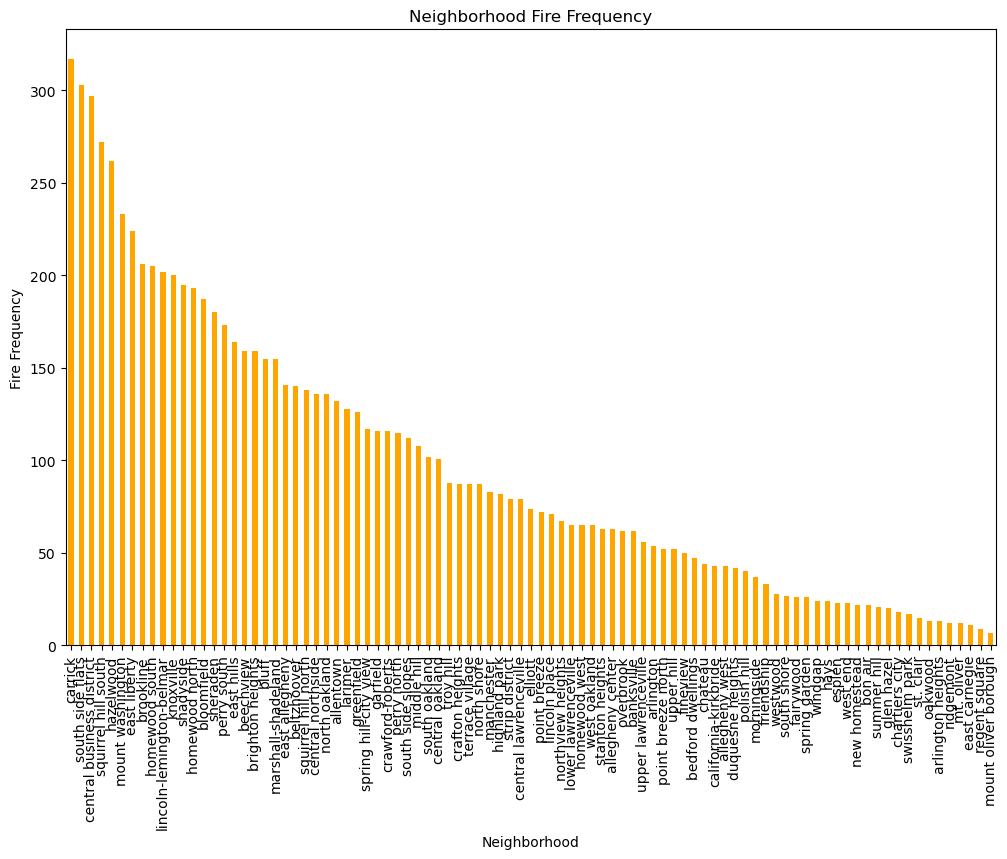

In [14]:
import pandas as pd
fires = pd.read_csv('Fires.csv')


fires['neighborhood'] = fires['neighborhood'].str.lower().str.strip()
neighborhood_count = fires['neighborhood'].value_counts()

visual = neighborhood_count.plot(kind='bar', figsize=(12, 8), color='orange')
visual.set_title('Neighborhood Fire Frequency')
visual.set_xlabel('Neighborhood')
visual.set_ylabel('Fire Frequency')

![GIF](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExeGZmOXBhMTBibnIycjFjYzFucWZ0Z3Q4ZWRzd3Z2a2hrcHkxbGtvayZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o6MbrACMlFCny8zmw/giphy.gif)

### The Best Neighborhood

According to my metric of safety, based off of the frequency of fires, Mount Oliver Borough is the best neighborhood.

## Zacariah Jonassaint's Notebook

## Shiv Shah's Notebook
### Personal Metric - Illegal Dump Sites

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv("dumpings.csv")  

# Count the number of unique neighborhoods
unique_neighborhoods = df['Neighborhood'].nunique()

print(f"Number of unique neighborhoods: {unique_neighborhoods}")


Number of unique neighborhoods: 152


##### Here I just wanted to show the total number of neighboorhoods that the data set takes into account.

In [ ]:
import pandas as pd

df = pd.read_csv('dumpings.csv')
df['Neighborhood'] = df['Neighborhood'].str.lower().str.strip()
df['estimated_tons'] = pd.to_numeric(df['estimated_tons'], errors='coerce')

neighborhood_counts = df['Neighborhood'].value_counts()
single_dump_neighborhoods = neighborhood_counts[neighborhood_counts == 1].index
single_dumps = df[df['Neighborhood'].isin(single_dump_neighborhoods)]
sorted_single_dumps = single_dumps.sort_values(by='estimated_tons', ascending=False)

print("Neighborhoods with only one dumping site, sorted by estimated tons:")
print(sorted_single_dumps[['Neighborhood', 'estimated_tons']])

##### Here I got the neighborhoods that had both 1 dumping site and looked at which had the amount from greatest amount
##### to least. This was because many of the neighborhoods had only 1 dumping site, so to determine which was cleaner, I looked at 
#####  how much each of the dumping sites had. The best was North Park, with 1 dumping site and the least weight, with 0.2 tons.

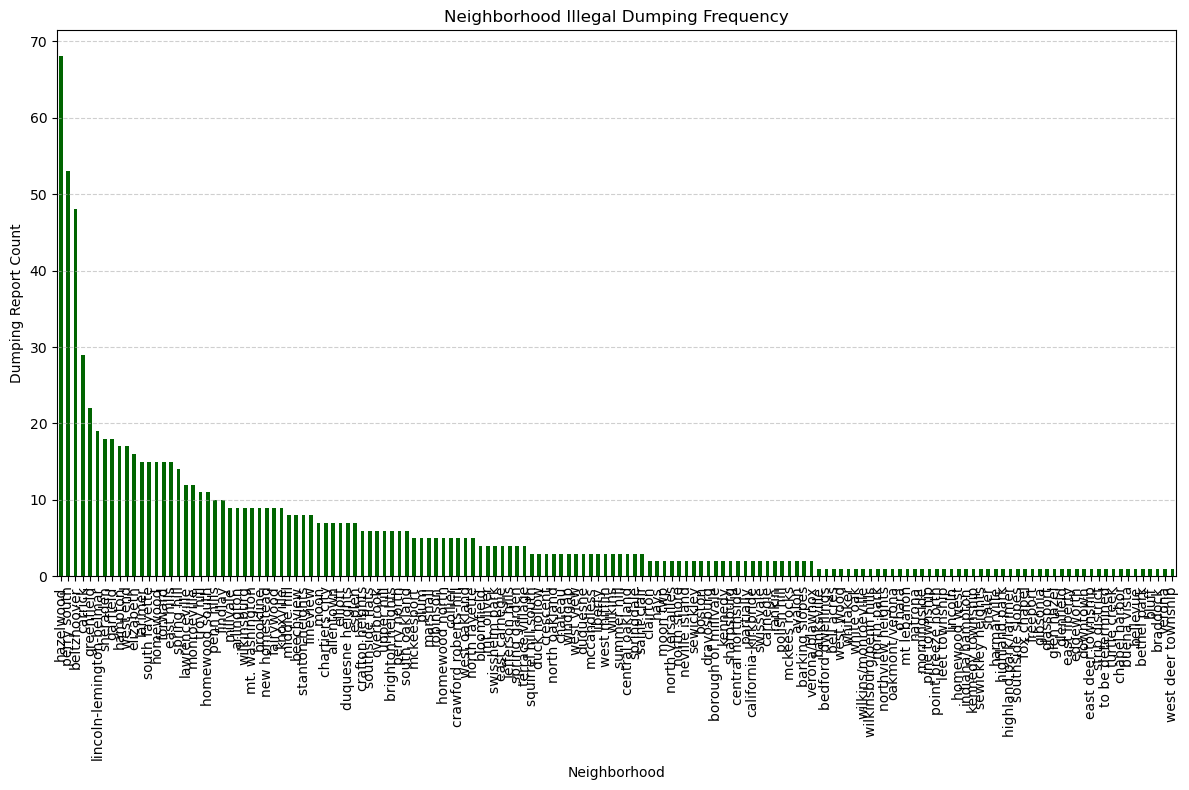

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dumpings.csv')

# Normalize the 'Neighborhood' column (lowercase + strip whitespace)
df['Neighborhood'] = df['Neighborhood'].str.lower().str.strip()

# Count how many times each neighborhood appears
neighborhood_count = df['Neighborhood'].value_counts()

# Create the plot
visual = neighborhood_count.plot(kind='bar', figsize=(12, 8), color='darkgreen')

# Customize the plot
visual.set_title('Neighborhood Illegal Dumping Frequency')
visual.set_xlabel('Neighborhood')
visual.set_ylabel('Dumping Report Count')

# Rotate x-axis labels 
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

## Kendall Foy's Notebook

### Andrew Schwab's Conclusion

Although Oakland is my favorite neighborhood, it is not the best in terms of this metric. North, Central, West, and South Oakland actually fall within the middle of the pack of fire frequency. So while they may not be the worst neighborhood here, they are defintely far the best, as Mount Oliver Borough ranks lowest in fire frequency.

### Zachariah Jonassaint's Conclusion

### Shiv Shah's Conclusion

Although I like north oakland and thought it would be one of the cleanest neighboorhoods it fell pretty high for illegal dumping sites. theyre are many neighborhoods that have 1 dumping site but the one with the smallest amount is north park which for my metric would make it the cleaniest.

### Kendall Foy's Conclusion

## Combined Graph

Based on this combined data, _____ is the best neighborhood in Pittsburgh